<a href="https://colab.research.google.com/github/NeonRio/imdb_lstm_sentimental_classification/blob/main/IMDB_sentimental_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMDB Dataset sentimental classification using LSTM and Keras

Don't forget to connect GPU to speed up train process

In [114]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, BatchNormalization, Conv1D, MaxPool1D, Dropout
from keras import utils, regularizers
from keras_preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Let's load our data

In [115]:
max_words=10000

In [116]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Data preparation before training

In [117]:
maxlen=200

In [118]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Let's look at an instance from our X data.

In [119]:
x_train[2000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,   14,   20, 1870,   39,  454, 2449,  262,
          4,  130,   25,  242,   92,   79,    2,  101,  433,  116,  769,
       1381,  370,  157,    2,   45,   32,   78,   55,   55,   78,   10,
         10,   21,  198,   51,  166,   12,    6,    2,  106,   12,   80,
        202,   25,   53,   74,  195,   52,  919,    4,  433,    4,  128,
         10,   10,   13,   66,   28,   57, 2307,   

##Neural Network creation process

In [120]:
model=Sequential([
    Embedding(max_words, 100, input_length=maxlen, trainable=True),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPool1D(pool_size=2),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

In [123]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 200, 100)          1000000   
                                                                 
 conv1d_8 (Conv1D)           (None, 200, 32)           9632      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 100, 32)          0         
 1D)                                                             
                                                                 
 lstm_25 (LSTM)              (None, 32)                8320      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,017,985
Trainable params: 1,017,985
Non-trainable params: 0
___________________________________________

##Neural Network training process

In [125]:
nn_history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 4s 13ms/step - loss: 0.4488 - accuracy: 0.7748 - val_loss: 0.3033 - val_accuracy: 0.8804
Epoch 2/10
176/176 [==============================] - 2s 10ms/step - loss: 0.2110 - accuracy: 0.9204 - val_loss: 0.2971 - val_accuracy: 0.8852
Epoch 3/10
176/176 [==============================] - 2s 10ms/step - loss: 0.1295 - accuracy: 0.9563 - val_loss: 0.3276 - val_accuracy: 0.8780
Epoch 4/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0838 - accuracy: 0.9746 - val_loss: 0.4002 - val_accuracy: 0.8732
Epoch 5/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0580 - accuracy: 0.9830 - val_loss: 0.4494 - val_accuracy: 0.8676
Epoch 6/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0416 - accuracy: 0.9883 - val_loss: 0.4401 - val_accuracy: 0.8728
Epoch 7/10
176/176 [==============================] - 2s 10ms/step - loss: 0.0278 - accuracy: 0.9928 - val_loss: 0.5531 - val_accuracy: 0.8724

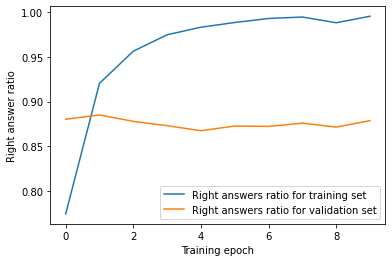

In [126]:
plt.plot(nn_history.history['accuracy'], label="Right answers ratio for training set")
plt.plot(nn_history.history['val_accuracy'], label="Right answers ratio for validation set")
plt.xlabel("Training epoch")
plt.ylabel("Right answer ratio")
plt.legend()
plt.show()

In graph we see that our model overfitted.

##Neural Network accuracy on test dataset

In [127]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 4s 5ms/step - loss: 0.6555 - accuracy: 0.8577


Thus we have overfitting, but we have 86% accuracy on test dataset. That's a good result for this simple NN.